# 0. Import necessary libraries

In [ ]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
from torch.utils.data import DataLoader
print(f"PyTorch version: {torch.__version__}\nTorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu118
Torchvision version: 0.16.0+cu118


## 0.1 set up device agnostic code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'working on : {device}')
!nvidia-smi

working on : cuda
Wed Nov 15 19:14:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                      

# 1. Get the data ready

## 1.0 Script for image resizing

### Tutorial on how to resize images cause many models perform well on specific dimensions
- https://pytorch.org/vision/stable/generated/torchvision.transforms.Resize.html
-Default is InterpolationMode.BILINEAR

In [ ]:
# import torch
# import numpy as np
# import matplotlib.pyplot as plt
# from torchvision import transforms


## run after getting the data

# # Choosing a Random Image from our dataset just to see the effects
# random_index = torch.randint(0, len(training_data), size=[1]).item()
# image, label = training_data[random_index]

# # Step 1: Preprocess the Image for viewing with matplotlib
# # Clamp the pixel values between 0 and 1
# image = torch.clamp(image, 0, 1)

# # Convert to NumPy and transpose the dimensions
# image_np = image.numpy()
# image_np = np.transpose(image_np, (1, 2, 0))

# # Step 2: Visualize the Original Image
# figure = plt.figure(figsize=(10, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(image_np)
# plt.title(f"Original Image of {class_names[label]}")

# # Print information about the original image
# print(f"Original Image size: {image.shape}")
# print(f"Label: {class_names[label]}")
# plt.axis('off')


# # RESIZING
# # Step 3: Resize the Image
# REQUIRED = 227 # required dimension
# resize_transform = transforms.Resize((REQUIRED, REQUIRED))
# resized_image = resize_transform(image)

# # Repeat everything for resized image as well
# resized_image = torch.clamp(resized_image, 0, 1)
# resized_image_np = resized_image.numpy()
# resized_image_np = np.transpose(resized_image_np, (1, 2, 0))

# plt.subplot(1, 2, 2)
# plt.imshow(resized_image_np)
# plt.title(f"Resized Image of {class_names[label]}")

# print(f"Resized Image size: {resized_image.shape}")

# # Display the plots
# # Turn off axis scales
# plt.axis('off')
# plt.show()


In [ ]:
models_transform = {'alexnet': 227, 'vgg16': 224}

def resize_images(model):
    '''Accepts model as string, e.g., 'alexnet', 'vgg16', then resizes the images accordingly'''
    print(f'Resizing images to dimension: {models_transform[model]} for {model}')
    transform = transforms.Compose([
        transforms.Resize((models_transform[model], models_transform[model])),
        transforms.ToTensor()
    ])
    return transform

## 1.1 Get the data from Torchvision and get familiar with it
**datasets** <br>
Returns:
(image, target) where target is index of the target class.

Return type:
tuple

In [ ]:
model = 'vgg16'

training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform = resize_images(model)
)

test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform = resize_images(model)
)

Resizing images to dimension: 224 for vgg16


100%|██████████| 169001437/169001437 [00:12<00:00, 13106098.02it/s]


Extracting data/cifar-100-python.tar.gz to data
Resizing images to dimension: 224 for vgg16
Files already downloaded and verified


In [ ]:
image , label = training_data[6]
print(image)
print(label)
print(f'The image shape is: {image.shape}')

tensor([[[0.1961, 0.1961, 0.1961,  ..., 0.2627, 0.2627, 0.2627],
         [0.1961, 0.1961, 0.1961,  ..., 0.2627, 0.2627, 0.2627],
         [0.1961, 0.1961, 0.1961,  ..., 0.2627, 0.2627, 0.2627],
         ...,
         [0.2980, 0.2980, 0.2980,  ..., 0.3765, 0.3765, 0.3765],
         [0.2980, 0.2980, 0.2980,  ..., 0.3765, 0.3765, 0.3765],
         [0.2980, 0.2980, 0.2980,  ..., 0.3765, 0.3765, 0.3765]],

        [[0.2118, 0.2118, 0.2118,  ..., 0.3098, 0.3098, 0.3098],
         [0.2118, 0.2118, 0.2118,  ..., 0.3098, 0.3098, 0.3098],
         [0.2118, 0.2118, 0.2118,  ..., 0.3098, 0.3098, 0.3098],
         ...,
         [0.2902, 0.2902, 0.2902,  ..., 0.2588, 0.2588, 0.2588],
         [0.2902, 0.2902, 0.2902,  ..., 0.2588, 0.2588, 0.2588],
         [0.2902, 0.2902, 0.2902,  ..., 0.2588, 0.2588, 0.2588]],

        [[0.2235, 0.2235, 0.2235,  ..., 0.2627, 0.2627, 0.2627],
         [0.2235, 0.2235, 0.2235,  ..., 0.2627, 0.2627, 0.2627],
         [0.2235, 0.2235, 0.2235,  ..., 0.2627, 0.2627, 0.

previously our image was of shape ([3, 32, 32]) [ Color_channel , Height , Width] means it is a RGB image in CHW format.

`color_channels = 3, height = 32, width = 32`
then we transformed it into `required height and required width` using interpolation methods.

In [ ]:
print(f' we got {len(training_data)} images and  {len(training_data.targets) } their corresponding labels in Train data')

 we got 50000 images and  50000 their corresponding labels in Train data


In [ ]:
print(f' we got {len(test_data)} images and  {len(test_data.targets) } their corresponding labels in Test data')

 we got 10000 images and  10000 their corresponding labels in Test data


In [ ]:
# let's see the classes names
class_names = training_data.classes
class_names

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [ ]:
print(f'Total classses to classify : {len(class_names)} (multiclass classification)')

Total classses to classify : 100 (multiclass classification)


## 1.2 let's visualize the data

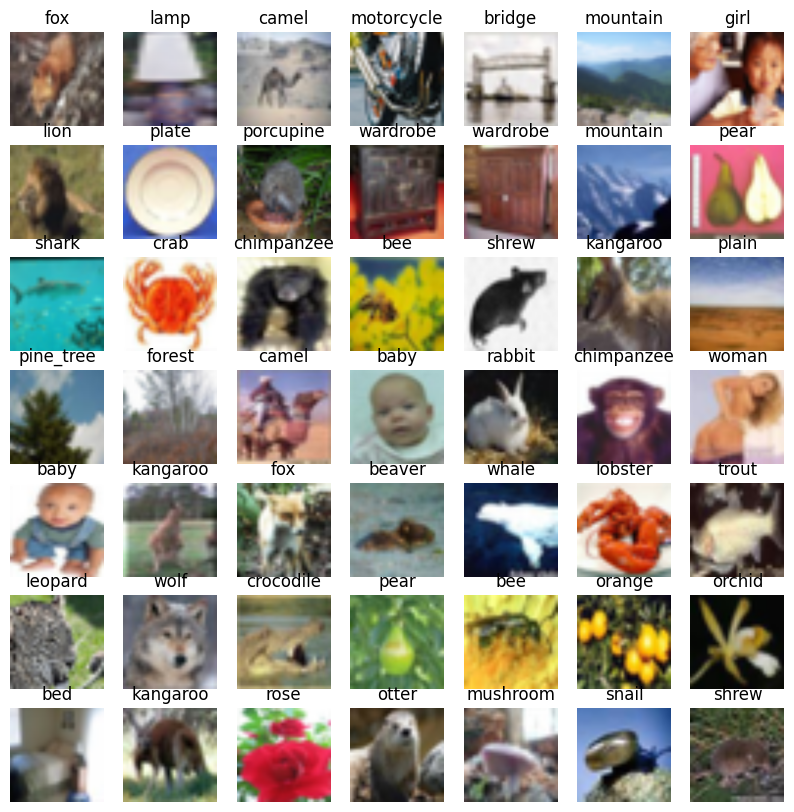

In [ ]:
plt.figure(figsize=(10, 10))
rows = 7
cols = 7

for i in range(1, rows * cols + 1):
    random_index = torch.randint(0, len(training_data), size=[1]).item()
    image, label = training_data[random_index]

    plt.subplot(rows, cols, i)
    image = torch.clamp(image, 0, 1)
    image_np = image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))

    plt.imshow(image_np)
    plt.title(class_names[label])

    # Turn off axis scales
    plt.axis('off')

plt.show()


## 2. Dataloader

In [ ]:
BATCH_SIZE = 16

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Size of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Size of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b047385a560>, <torch.utils.data.dataloader.DataLoader object at 0x7b0473859120>)
Size of train dataloader: 3125 batches of 16
Size of test dataloader: 625 batches of 16


In [ ]:
# Let's check out what's inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

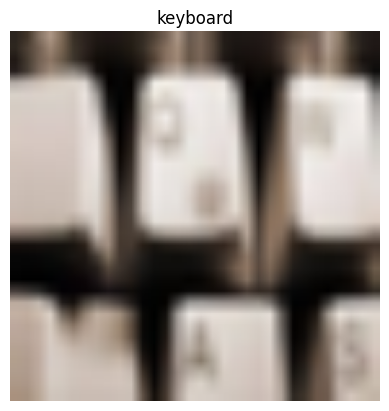

Image size: torch.Size([3, 227, 227])
Label: 39


In [ ]:
random_index = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = training_data[random_index]

image = torch.clamp(image, 0, 1)
image_np = image.numpy()
image_np = np.transpose(image_np, (1, 2, 0))

plt.imshow(image_np)
plt.title(class_names[label])

plt.axis('off')

plt.show()
print(f"Image size: {image.shape}")
print(f"Label: {label}")

# 3. Let us create functions for `train_loop` , `test_loop` and `evaluate_model`

In [ ]:
def train_loop(model, dataloader, loss_function, optimizer, accuracy_function, device='cuda'):
    model.train()
    train_loss = 0
    train_accuracy = 0
    model.to(device)

    for batch, (X, y) in enumerate(dataloader):
      if batch % 500 == 0:
        print(f"Processing batch {batch}...")

      X, y = X.to(device), y.to(device)

      #1. do the  Forward pass
      y_pred = model(X)

      # 2. Calculate the loss and accuarcy
      loss = loss_function(y_pred, y)
      train_loss += loss.item()

      train_accuracy += accuracy_function(y_pred.argmax(dim=1), y).item()

      # 3. optimizer zero grad
      optimizer.zero_grad()
      # 4 . loss backwards
      loss.backward()
      # 5 . optimizer step step step
      optimizer.step()

    # Average loss and accuracy over batches and print out what's happening
    total_len = len(dataloader)
    train_loss /= total_len
    train_accuracy /= total_len

    print(f"Train loss: {train_loss:.5f} | Train accuracy: {100 * train_accuracy:.3f}%")

In [ ]:
def test_loop(model: torch.nn.Module,
              dataloader,
              loss_function,
              accuracy_function,
              device=device):
    test_loss = 0
    test_accuracy = 0

    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            # 1. do the forward pass
            test_pred = model(X)

            # 2. calculate the loss
            test_loss += loss_function(test_pred, y).item()
            test_accuracy += accuracy_function(test_pred.argmax(dim=1), y).item()

    # Scale loss and acc
    total_len = len(dataloader)
    test_loss /= total_len
    test_accuracy /= total_len

    # 3. print out what's happening
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {100 * test_accuracy:.3f}%")

In [ ]:
torch.manual_seed(42)
def evaluate_model(model: torch.nn.Module,
                   dataloader,
                   loss_function,
                   accuracy_function,
                   device = device):

    loss = 0
    accuracy = 0
    model.eval()
    with torch.inference_mode():
        for X, y in dataloader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_function(y_pred, y)
            accuracy += accuracy_function(y_pred.argmax(dim=1), y)

        # Scale loss and acc
        total_len = len(dataloader)
        loss /= total_len
        accuracy /= total_len

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": accuracy}


In [ ]:
def print_train_time(start, end , device, EPOCHS):
  '''
  takes in start time , end time, device , and epochs then prints and returns total training time.

  '''
  total_time = end - start
  print(f"Train time on {device} FOR {EPOCHS} epochs: {total_time:.3f} seconds")
  return total_time

# 4. Model0 : VGG16

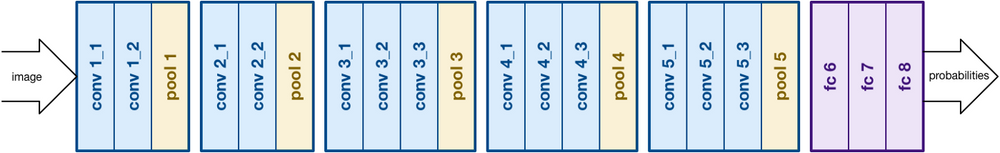

![](https://miro.medium.com/v2/resize:fit:827/1*UeAhoKM0kJfCPA03wt5H0A.png)

In [ ]:
class VGG16(nn.Module):
    def __init__(self, num_classes):
        super(VGG16, self).__init__()

        # 1st block
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))

        #2nd block
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))

        #3rd block
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))

        #4th block
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))

        #5th block
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))

        #fully connected layer/ fc / dense
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            # if it was 32x32 then no need for 7*7
            # always test the shapes by evaluating some random tensor
            nn.ReLU())

        #dense 2
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())

        #dense 3
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))



    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        # print(f'1-> {out.shape}')
        out = out.reshape(out.size(0), -1)
        # print(f'2-> {out.shape}')
        out = self.fc(out)
        # print(f'3-> {out.shape}')
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [ ]:
model0 = VGG16(num_classes = len(class_names))

In [ ]:
model0.to(device)

VGG16(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

In [ ]:
LEARNING_RATE = 0.01

In [ ]:
loss_function_VGG16 = nn.CrossEntropyLoss()
optimizer_VGG16 = torch.optim.SGD(params = model0.parameters(),
                                  lr =LEARNING_RATE  )

In [ ]:
try:
  import torchmetrics
except:
  !pip install torchmetrics
  import torchmetrics

In [ ]:
from torchmetrics import Accuracy
accuracy = Accuracy(task = 'multiclass', num_classes = 100).to(device)

[More about VGG16](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fnerd-for-tech%2Fvgg-16-easiest-explanation-12453b599526&psig=AOvVaw3X0KEG7-mVDCHqxQY61Smt&ust=1699968005380000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCIjd2rqIwYIDFQAAAAAdAAAAABAX)

In [ ]:
# lets try passing random tensors of same image shape to check if any parameters are wrong
torch.manual_seed(42)
torch.cuda.manual_seed(42)

random_image = torch.randn(size=(3,227,227)).to(device)

In [ ]:
random_image[0].shape

torch.Size([227, 227])

In [ ]:
model0.eval()
with torch.inference_mode():
  y_random = model0(random_image.unsqueeze(dim = 0))
y_random

tensor([[ 1.4395e-02, -1.2643e-02,  1.0446e-02, -3.4167e-03, -1.0238e-02,
          1.1768e-02, -8.7989e-03, -8.0946e-03, -1.3297e-02,  1.2046e-02,
          1.1351e-02,  5.9187e-03,  7.3978e-04, -8.9332e-03, -1.2152e-02,
          8.2083e-03, -8.9813e-03, -1.0358e-03,  6.9107e-04, -1.6274e-03,
         -2.6184e-03,  5.0151e-03, -1.2707e-04, -1.4384e-02,  1.2223e-02,
          2.0221e-03, -7.4777e-03,  4.1709e-03,  2.4288e-03,  2.8596e-03,
          8.2627e-03, -9.2807e-03, -5.6437e-03, -1.3871e-02, -5.5503e-03,
          1.5606e-02,  5.8815e-03,  9.2613e-03,  1.4561e-02, -1.2635e-02,
         -1.4990e-03,  4.9521e-03,  2.8880e-03, -5.6773e-03, -8.0869e-03,
         -1.2213e-02, -8.3954e-03,  6.7125e-03,  1.1687e-02,  2.0154e-06,
         -6.8712e-04,  1.5366e-02,  1.8323e-02,  6.1867e-03, -5.3593e-04,
         -1.4459e-02,  9.1265e-03, -1.1542e-02, -1.2337e-02,  9.5515e-03,
          9.0794e-03, -4.5423e-03, -7.7160e-03,  5.0416e-03, -2.5797e-03,
          3.6777e-03, -1.0534e-02,  1.

ok.no shape error. no dtype error. all clear. works fine.

now time for training on our dataset

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer

start = timer()
EPOCHS = 1
for epoch in range(EPOCHS):
  print(f'Epoch: {epoch}\n-----')


  train_loop(model0, train_dataloader , loss_function_VGG16 , optimizer_VGG16,accuracy)
  test_loop(model0, test_dataloader , loss_function_VGG16, accuracy)

end = timer()
total_time_VGG16 = print_train_time(start, end , device, EPOCHS)

Epoch: 0
-----
Processing batch 0...
Processing batch 500...
Processing batch 1000...
Processing batch 1500...
Processing batch 2000...
Processing batch 2500...
Processing batch 3000...
Train loss: 3.81174 | Train accuracy: 10.958%
Test loss: 3.22257 | Test accuracy: 21.290%
Train time on cuda FOR 1 epochs: 986.605 seconds


In [ ]:
# Get model results
model0_results = evaluate_model(
    model0,
    test_dataloader,
    loss_function_VGG16,
    accuracy)
model0_results

{'model_name': 'VGG16',
 'model_loss': 3.2225723266601562,
 'model_acc': tensor(0.2129, device='cuda:0')}

#5. Model1: Alexnet

![](https://miro.medium.com/v2/resize:fit:1200/1*3B8iO-se13vA2QfZ4OBRSw.png)

In [ ]:
class Alexnet(nn.Module):
  def __init__(self, num_classes):
    super().__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels= 3, out_channels = 96, kernel_size = 11 , stride = 4, padding = 0),
        nn.BatchNorm2d(96),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv3d(in_channels = 96, out_channels=256 , kernel_size = 5, stride = 1, padding = 2),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2)
    )

    self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels= 256, out_channels = 384, kernel_size = 3 , stride = 1, padding = 1),
        nn.BatchNorm2d(384),
        nn.ReLU()
    )

    self.layer4 = nn.Sequential(
        nn.Conv2d(in_channels = 384 , out_channels = 384 , kernel_size = 3, stride = 1 , padding = 1),
        nn.BatchNorm2d(256),
        nn.ReLU()
    )

    self.layer5 = nn.Sequential(
        nn.Conv2d(in_channels = 384 , out_channels = 256 , kernel_size = 3, stride = 1 , padding = 1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2)
    )

    self.fc = nn.Sequential(
        nn.Dropout(p = 0.5),
        nn.Linear(9216, 4096),
        nn.ReLU()
    )

    self.fc1 = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU()
    )

    self.fc2= nn.Sequential(
        nn.Linear(4096, num_classes)
    )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [ ]:
model1 = Alexnet(len(class_names))
model1.to(device)

Alexnet(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv3d(96, 256, kernel_size=(5, 5, 5), stride=(1, 1, 1), padding=(2, 2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): 